In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json
import os

2024-12-09 10:41:55.326341: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-09 10:41:55.331085: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-09 10:41:55.346921: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733737315.373296   61407 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733737315.381181   61407 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [3]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

W0000 00:00:1733737321.912143   61407 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


TensorShape([60000, 28, 28, 1])

In [4]:
train_x[0].shape

TensorShape([28, 28, 1])

In [5]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(pool_size=(2, 2)), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(pool_size=(2, 2)), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

/users/jackdu2163/Documents/HSP/LeNet-5/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [7]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8835 - loss: 0.3999 - val_accuracy: 0.9752 - val_loss: 0.0820
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9712 - loss: 0.0922 - val_accuracy: 0.9852 - val_loss: 0.0524
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9806 - loss: 0.0599 - val_accuracy: 0.9898 - val_loss: 0.0374
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9866 - loss: 0.0441 - val_accuracy: 0.9892 - val_loss: 0.0358
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9888 - loss: 0.0344 - val_accuracy: 0.9930 - val_loss: 0.0220


In [17]:
lenet_5_model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9832 - loss: 0.0562


[0.05093966796994209, 0.9847000241279602]

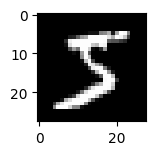

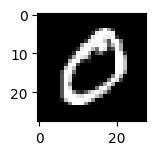

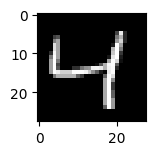

In [18]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [19]:
lenet_5_model.save('lenet_5_model.keras')
print(os.listdir('.'))

['printMNIST.cu', 'train-images.idx3-ubyte', 'part3.cu', 'FashionMNIST.weights.h5', 'fashionmnist_model.json', 'printMNIST', 'LeNet5.ipynb', 'my.h5', 'lenet_5_model.keras', 'train-images.zip', 'softmax']


In [20]:
lenet_5_model.save("my.h5")

In [21]:
lenet_5_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

In [22]:
json_model = lenet_5_model.to_json()

In [23]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [24]:
lenet_5_model.save_weights('FashionMNIST.weights.h5')

In [25]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[-0.00823004, -0.19348243, -0.12980685,  0.07918884,
           0.20527005, -0.06001487]],

        [[ 0.13570806, -0.14836633,  0.10139949, -0.1282849 ,
          -0.28647277, -0.2792466 ]],

        [[ 0.22542845, -0.17851491,  0.04851778, -0.41011107,
          -0.3046486 , -0.2707929 ]],

        [[ 0.50062966, -0.19162627, -0.17571488, -0.26695397,
          -0.28814003, -0.2593724 ]],

        [[ 0.3043258 , -0.45832062, -0.33917406, -0.30381578,
          -0.05601425,  0.050259  ]]],


       [[[-0.14547157, -0.20748293,  0.25423315, -0.04375198,
          -0.24063188,  0.1947464 ]],

        [[ 0.31669882, -0.10414296,  0.4534805 , -0.3572161 ,
          -0.57970583, -0.15358528]],

        [[ 0.5578957 , -0.20172359,  0.4033658 , -0.4709495 ,
          -0.5812687 ,  0.06697186]],

        [[ 0.6856329 , -0.22483258,  0.2247801 , -0.42490065,
          -0.21397066, -0.2104752 ]],

        [[ 0.41806373, -0.09904509, -0.14623694, -0.08136093,
           0.12657605,  0.1

In [3]:
import h5py

weights_path = 'FashionMNIST.weights.h5'
model_weights = h5py.File(weights_path, 'r')

# Extract weights and biases 'conv2d'
conv1_weights = model_weights['layers']['conv2d']['vars']['0'][:]
conv1_biases = model_weights['layers']['conv2d']['vars']['1'][:]

# Save into binary files
conv1_weights.tofile('conv1_weights.dat')
conv1_biases.tofile('conv1_biases.dat')

print("Weights and biases saved successfully!")


Weights and biases saved successfully!
